# **CRISP-DM OPERATION ON AIRBNB DATASET**

THIS NOTEBOOK SEEKS TO PERFORM CRISP-DM OPERATION ON AIRBNB DATA TO DEMONSTRATE AND SHOW HOW DATASCIENCE TECHNIQUES CAN BE SUED TO GAI NINSIGHTS INTO DATA AND ARRIVE AT A LOGICAL CONCLUSION


CRISP-DM (Cross-Industry Standard Process for Data Mining)

* Business Understanding

* Data Understanding

* Data Preparation

* Modeling

* Evaluation

* Deployment

## **BUSINESS UNDERSTANDING**

*Airbnb, Inc. is a vacation rental online marketplace company that offers arrangement for lodging, primarily homestays, or tourism.
The Airbnb revenue model runs on the listings and the stays. Airbnb offers a platform where these listings and bookings are made and this is where Airbnb earns from*.

Two major sources of revenue of AirBnB

**Commission from hosts:**
Everytime someone chooses a host’s property and makes payment, Airbnb takes 10% of the payment amount as commission. This is one of the components of Airbnb fee structure.

**Transaction fee from travelers:**
When travelers make payment for stay they are charged a 3% fee for transaction. This amount adds to the Airbnb revenue.

ref:https://appinventiv.com/blog/airbnbs-business-model-and-revenue-source/#:~:text=Airbnb%20offers%20a%20platform%20where,the%20payment%20amount%20as%20commission



### **So How can new host have a good start on Airbnb?**

The number of time someone chooses host's property and pays, the more income/revenue to the host 

1. What type of property type are most people interested in?

2. What are the top 10 characteristics of listing that influence the price of listings?

3. When is the best time to host a listing for booking?








## **DATA UNDERSTANDING**


* **listings**: including full descriptions and average review score

* **calendar**: including listing id and the price and availability for that day

* **reviews** : including unique id for each reviewer and detailed comments


In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
import seaborn as sns


import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


In [78]:
listing_df = pd.read_csv('/kaggle/input/seattle/listings.csv')
calender_df = pd.read_csv('/kaggle/input/seattle/calendar.csv')
reviews_df = pd.read_csv('/kaggle/input/seattle/reviews.csv') 

Now let's take a look at each data 

Listing Dataset

In [79]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [80]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [81]:
# the shape of listing dataset : 3818 rows and 92 columns
listing_df.shape

(3818, 92)

In [82]:
# check columns with not null values( these are the unique features that are required to every listing)
listing_df.columns[listing_df.isnull().sum() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [83]:
print("listing dataset has {} columns with non null values".format(len(listing_df.columns[listing_df.isnull().sum() == 0])))

listing dataset has 47 columns with non null values


In [84]:
# check the dtype of the columns which are objects and floats

no_object_columns=len(listing_df.select_dtypes(exclude ='float64').columns)

no_float_columns=len(listing_df.select_dtypes(exclude ='object').columns)


print("there are {} number of float columns as well as {} number of object dtype columns"\
      .format(no_float_columns,no_object_columns))

there are 30 number of float columns as well as 75 number of object dtype columns


Questions to answer on this dataset?

* Which features contribute to higher or positive reviews. This can give us an idea as to what people realy like and what host should consider before listing?

There are so many columns in this ataset but we only want to consider the features of a listings

In [85]:
# features to consider

features = ['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','guests_included', 'minimum_nights',
       'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']

label = ['review_scores_rating']

In [86]:
listing_df[['review_scores_rating','review_scores_accuracy']].describe().reset_index()

,index,review_scores_rating,review_scores_accuracy
0,count,3171.000000,3160.000000
1,mean,94.539262,9.636392
2,std,6.606083,0.698031
3,min,20.000000,2.000000
4,25%,93.000000,9.000000
5,50%,96.000000,10.000000
6,75%,99.000000,10.000000
7,max,100.000000,10.000000


THe minimum rating here is 20 and looks like most listings got good ratings from 25th to 75th percentile.

the review score rating reflect with the review score accuracy

so we can use review score rating as a label for finding features in a listings that had very good rating


Our next question we want to ask on thi dataset is that, What type of listing generate highested income

To get this, we have to get all listings that have been rated. Which means a host has lent it to a traveler and has paid for it.

Then query the price for that listing and get the listings with highest income generated

Note that air bnb charges 10% from the host for listing and 3% transaction fee from the traveler. But in this analysis we would not be adding that.

**Our focus now is to get listings that people or travelers really booked and how much they paid for it and get the highest**



In [87]:
# we would be using the listing dataset together with the reviews dataset

# first select listing id's from the reviews dataset that had a review( meaning a traveler booked the listing)


# get booked listings or listings that has been reviewed
reviwed_listings = listing_df[listing_df.id.isin(reviews_df.listing_id)]


# how many listings were actually reviewed
reviwed_listings.shape[0]

3191

In [88]:
# confirm the number lets see listings that werent reviewed and check their review scoure

non_reviwed_listings = listing_df[~listing_df.id.isin(reviews_df.listing_id)]

non_reviwed_listings.review_scores_rating.unique()[0]

nan

Non reviewed listings has no review scoure

Now lets focus on reviewed listings

In [89]:
# check how many unique values we have for each column

reviwed_listings.describe()
for col in reviwed_listings.columns:
    unique = len(reviwed_listings[col].unique())
    print(col, "unique({})".format(unique) )

id unique(3191)
listing_url unique(3191)
scrape_id unique(1)
last_scraped unique(1)
name unique(3173)
summary unique(2888)
space unique(2756)
description unique(3128)
experiences_offered unique(1)
neighborhood_overview unique(2209)
notes unique(1817)
transit unique(2282)
thumbnail_url unique(2931)
medium_url unique(2931)
picture_url unique(3191)
xl_picture_url unique(2931)
host_id unique(2303)
host_url unique(2303)
host_name unique(1289)
host_since unique(1268)
host_location unique(101)
host_about unique(1795)
host_response_time unique(5)
host_response_rate unique(44)
host_acceptance_rate unique(3)
host_is_superhost unique(2)
host_thumbnail_url unique(2299)
host_picture_url unique(2299)
host_neighbourhood unique(96)
host_listings_count unique(27)
host_total_listings_count unique(27)
host_verifications unique(84)
host_has_profile_pic unique(2)
host_identity_verified unique(2)
street unique(1310)
neighbourhood unique(81)
neighbourhood_cleansed unique(87)
neighbourhood_group_cleansed uniq

In [90]:
# get rid of columns with only one unique features as this will not help us in our analysis

unique_columns = reviwed_listings.columns[reviwed_listings.nunique() > 1]
reviwed_listings = reviwed_listings[unique_columns]

reviwed_listings.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'zipcode', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee',

We will not be considering all the columns in this dataset

We just want to pick the main features of a listing and see how it relates to review and pricing

In [91]:
feature_columns = ['city', 'zipcode', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy' ]

reviwed_listings = reviwed_listings[feature_columns]

Let see the correlation of these features

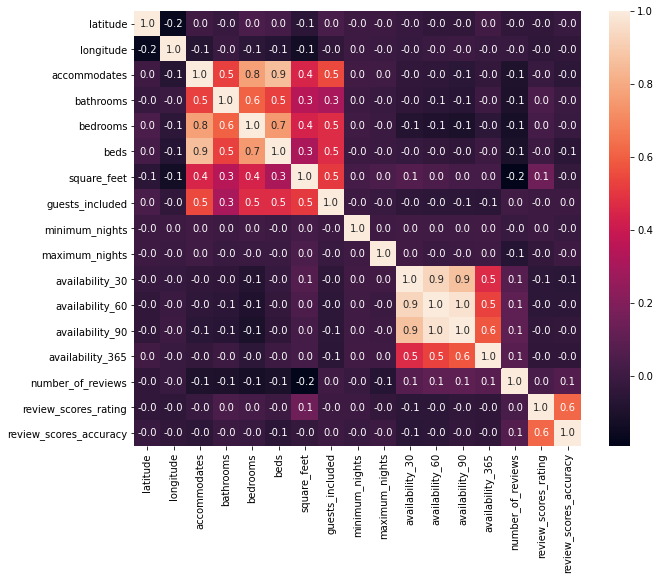

In [92]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(reviwed_listings.corr(), annot=True, fmt=".1f");

Numerical Features with strong correlation:
* bedrooms
* bathrooms
* accomodation
* beds
* review_score_rating
* review_score_accuracy
* square_feet
* guest_included



In [93]:
num_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet',
                'guests_included', 'availability_30', 'availability_60', 'availability_90',
               'availability_365','review_scores_rating', 'review_scores_accuracy']


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# select numeric columns we are interested in 
numberic_df = reviwed_listings[num_features]

# select categorical date
categorical_df = reviwed_listings[reviwed_listings.select_dtypes(exclude=numerics).columns ]

# add them together
new_listing_df = pd.concat([categorical_df,numberic_df], axis=1)

new_listing_df.head()

,city,zipcode,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,...,bedrooms,beds,square_feet,guests_included,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy
0,Seattle,98119,"Seattle, WA",t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,...,1.0,1.0,NaN,2,14,41,71,346,95.0,10.0
1,Seattle,98119,"Seattle, WA",t,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00",...,1.0,1.0,NaN,1,13,13,16,291,96.0,10.0
2,Seattle,98119,"Seattle, WA",t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,NaN,...,5.0,7.0,NaN,10,1,6,17,220,97.0,10.0
4,Seattle,98119,"Seattle, WA",t,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,NaN,...,3.0,3.0,NaN,6,30,60,90,365,92.0,9.0
5,Seattle,98119,"Seattle, WA",t,House,Private room,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",$120.00,$800.00,...,1.0,1.0,NaN,1,0,0,27,302,95.0,10.0


Lets now get more insight into the data



In [94]:
plt_data = new_listing_df.groupby(['accommodates', 'bathrooms', 'bedrooms', 'beds'])['review_scores_rating'].sum().reset_index()
plt_data

,accommodates,bathrooms,bedrooms,beds,review_scores_rating
0,1,0.5,1.0,1.0,883.0
1,1,1.0,0.0,1.0,80.0
2,1,1.0,1.0,1.0,12357.0
3,1,1.5,1.0,1.0,1321.0
4,1,2.0,1.0,1.0,929.0
...,...,...,...,...,...
289,15,4.0,4.0,7.0,97.0
290,16,2.0,6.0,9.0,97.0
291,16,3.5,4.0,10.0,95.0
292,16,3.5,6.0,15.0,98.0


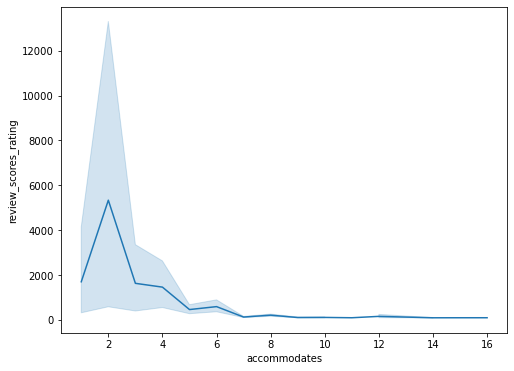

In [95]:
f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(  y="review_scores_rating", x= "accommodates", data=plt_data);

The lower the number people allowed for accomodation, the higher the review score

We can also see that there are nun values in the data but 

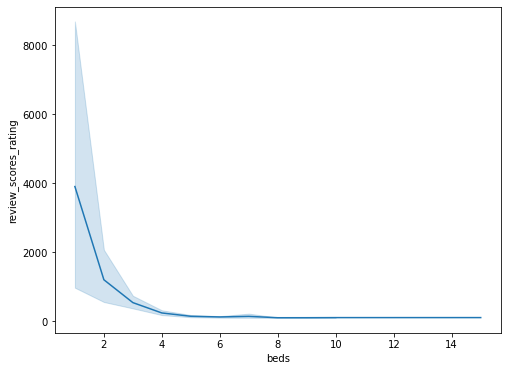

In [96]:
f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(  y="review_scores_rating", x= "beds", data=plt_data);

The same is true for this too. the lower the listing bed number, the higher the review score

Let's take a look at the bedrooms

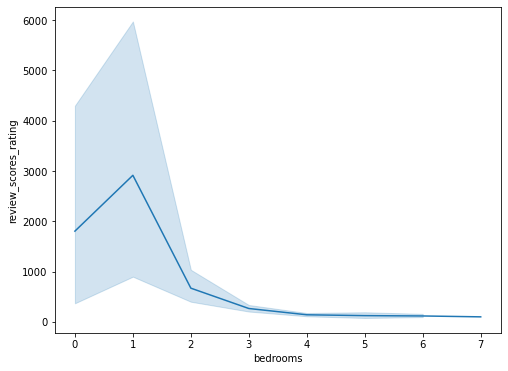

In [97]:

f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(  y="review_scores_rating", x= "bedrooms", data=plt_data);


Same here. Looks like Most people are interested with listings with fewer bedrooms, beds, bathrooms and accomodation number.

This shows that most people book homes for only themselves or just two or 3 people.



Now lets see which property type had the highest sum of review score



In [98]:
prop_data = new_listing_df.groupby(['property_type'], sort=True)['review_scores_rating'].sum().reset_index()
prop_data

,property_type,review_scores_rating
0,Apartment,134200.0
1,Bed & Breakfast,2489.0
2,Boat,478.0
3,Bungalow,879.0
4,Cabin,2021.0
5,Camper/RV,957.0
6,Chalet,167.0
7,Condominium,6577.0
8,Dorm,180.0
9,House,138457.0


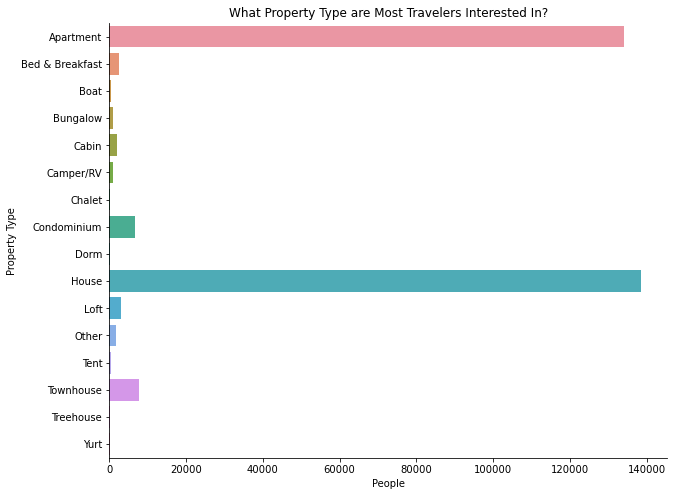

In [99]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=prop_data, x="review_scores_rating", y="property_type", orient="h");

plt.title('What Property Type are Most Travelers Interested In?')
plt.xlabel('People')
plt.ylabel('Property Type')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


House and Apartment were the property types that a higher sum of review score

This is telling us that people are interested in both house and apartment property type

Next we want to find out what choice listing generated a lot or income or that most people paid for 

In [100]:
new_listing_df.price = new_listing_df.price.replace('[\$,]', '', regex=True).astype(float)

In [101]:

price_df = new_listing_df.groupby(['property_type'],
                       sort=True)['price'].sum().reset_index()
price_df

,property_type,price
0,Apartment,178342.0
1,Bed & Breakfast,2448.0
2,Boat,1785.0
3,Bungalow,884.0
4,Cabin,2198.0
5,Camper/RV,826.0
6,Chalet,197.0
7,Condominium,10273.0
8,Dorm,79.0
9,House,191345.0


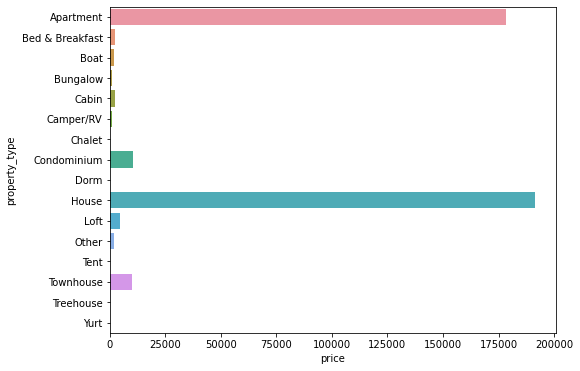

In [102]:

f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=price_df, x="price", y="property_type", orient="h");

The interest drives income as we can see from the chart

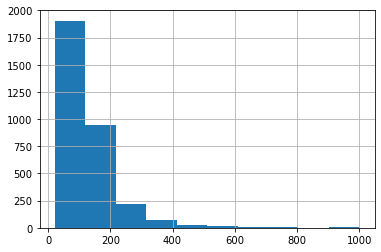

In [103]:
# lets take a look at the distribution of price

new_listing_df.price.hist(bins=10)

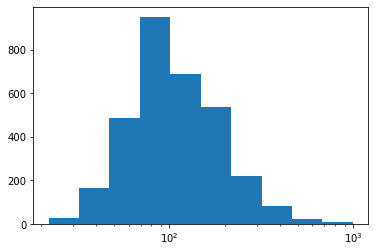

In [104]:
# add log filter to the price and visualize

def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

plot_loghist(new_listing_df.price, 10)

the distribution looks right skewed

In [105]:
# the mean price for all listings

new_listing_df.price.sort_values(ascending=True).reset_index().mean()['price']

127.09840175493575



Checking out Calender dataset

In [106]:
calender_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [107]:
# the shape of calender dataset : 1393570 rows and 4 columns
calender_df.shape

(1393570, 4)

In [108]:
# check columns with not null values
calender_df.columns[calender_df.isnull().sum() == 0]

Index(['listing_id', 'date', 'available'], dtype='object')

In [109]:
# check the dtypes

calender_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

Questions to ask on this dataset

what does the *f and t* in the available column  stands for and how does it affect other columns?

which dates or times are have higest prices?

what is the trend in pricing?

In [110]:
# perhaps t stands for true and f for false 
calender_df['available'].unique()

array(['t', 'f'], dtype=object)

how does available column relate to price column

as we have seen, we know that the available column does not containy any null values wereas the price columns does have some null values

In [111]:
# select rows with f[false] availability values and check their label for price

calender_df[calender_df['available'] == 'f']['price'].unique()

array([nan], dtype=object)

In [112]:
# select rows with t[true] availability values and check their label for price
calender_df[calender_df['available'] == 't']['price'].unique()

array(['$85.00', '$125.00', '$154.00', '$164.00', '$165.00', '$150.00',
       '$145.00', '$144.00', '$148.00', '$155.00', '$149.00', '$156.00',
       '$166.00', '$152.00', '$147.00', '$146.00', '$151.00', '$158.00',
       '$168.00', '$169.00', '$192.00', '$175.00', '$162.00', '$171.00',
       '$173.00', '$153.00', '$177.00', '$183.00', '$181.00', '$170.00',
       '$179.00', '$167.00', '$184.00', '$186.00', '$172.00', '$180.00',
       '$190.00', '$178.00', '$196.00', '$197.00', '$202.00', '$198.00',
       '$205.00', '$214.00', '$218.00', '$211.00', '$193.00', '$204.00',
       '$189.00', '$187.00', '$194.00', '$185.00', '$206.00', '$191.00',
       '$207.00', '$208.00', '$188.00', '$200.00', '$209.00', '$210.00',
       '$195.00', '$201.00', '$199.00', '$203.00', '$182.00', '$163.00',
       '$159.00', '$157.00', '$142.00', '$136.00', '$134.00', '$137.00',
       '$143.00', '$135.00', '$141.00', '$130.00', '$138.00', '$133.00',
       '$129.00', '$127.00', '$126.00', '$131.00', '

we see that listings with availability set to t[True] are the once with only a price specified. All the rest with availability set to f[False] have Nan values in the price column.

The obviously indicate to us the date for people to book and the price to pay for the accomodation

What is the seasonality in the pricing




In [113]:
# get data for listings which are available for booking
available_for_listing = calender_df[calender_df['available'] == 't']


# convert date object to datetime for plot
available_for_listing['date'] = available_for_listing['date'].apply(pd.to_datetime)


# convert price column to int

available_for_listing['price']=available_for_listing['price'].apply(lambda x: float(str(x).replace('$','').replace(',','') ))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [114]:
available_for_listing.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


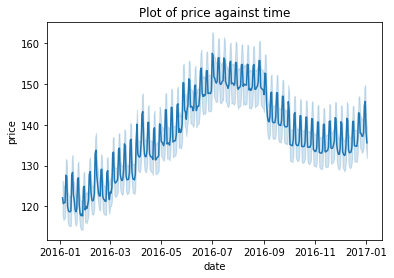

In [115]:
#Plot the responses for different events and regions
plt.title('Plot of price against time')
sns.lineplot(data= available_for_listing, x="date", y="price");

We see there is a trend in the price of listings for booking for the years 2016 to 2017.

But there is a lot of noise in the data so lets clean or smothen it

Now lets aggregate and smothen out the line on the chart

In [116]:
# aggregate all price in a month 
grouper = pd.Grouper(key='date', freq='M')
result = available_for_listing.groupby(grouper)['price'].sum().reset_index()

result

,date,price
0,2016-01-31,7201591.0
1,2016-02-29,9113355.0
2,2016-03-31,10798161.0
3,2016-04-30,10272371.0
4,2016-05-31,11159008.0
5,2016-06-30,11391415.0
6,2016-07-31,11288732.0
7,2016-08-31,11502179.0
8,2016-09-30,11065949.0
9,2016-10-31,11296639.0


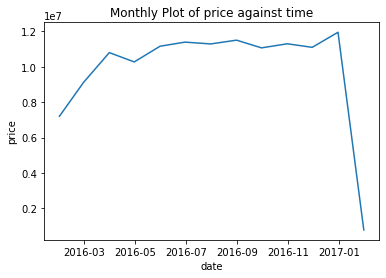

In [117]:
plt.title('Monthly Plot of price against time')
sns.lineplot(data= result, x="date", y="price");

This looks better.
As we can see, prices of listing begins to rise from january to may and barely levels then starts to climb from september and peaked in november/ december 
then fell very low january 2017.

The peak in november/ december indicates that most host put their property for booking because a lot of people travel during this time


In [118]:
# let's see if this is true
travel_date=[]
tavel_price=[]
for year in result.date.dt.year.unique():

    year_value= result[result.date.dt.year == year]
    max_value = year_value.price.max()
    year_date =result[result.price == max_value].date.dt.date.values[0]
    travel_date.append(year_date)
    tavel_price.append(max_value)
    
    print(year, year_date, max_value)
    

2016 2016-12-31 11949282.0
2017 2017-01-31 779957.0


December and january saw the total highest price that host put on their listings for the year 2016

Review dataset

In [119]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [120]:
# the shape of reviews dataset : 84849 rows and 6 columns
reviews_df.shape

(84849, 6)

In [121]:
# check columns with not null values
reviews_df.columns[reviews_df.isnull().sum() == 0]

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name'], dtype='object')

Questions to ask about the reviews data 


when do most people review listings, this can give us an indication of when people do travel a lot



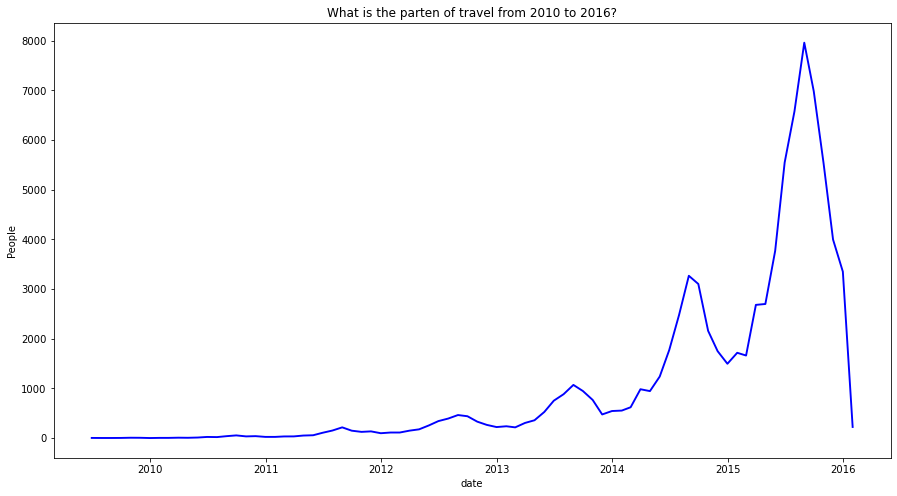

In [122]:
reviews_df.date= pd.to_datetime(reviews_df.date)
grouper = pd.Grouper(key='date', freq='M')

review_new_df = reviews_df.groupby(grouper)['id'].count().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(review_new_df.date, review_new_df.id, color='b', linewidth=1.9)
plt.title("What is the parten of travel from 2010 to 2016?")
plt.xlabel('date')
plt.ylabel('People')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


THe number of people who review thats to climb from june there but not so sure

we have to take a deeper look into that

In [123]:
review_new_df.date.dt.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [124]:
# get the dates each year with the highest number of reviews

travel_date=[]
tavel_value=[]
for year in review_new_df.date.dt.year.unique():

    
    year_value= review_new_df[review_new_df.date.dt.year == year]
    max_value = year_value.id.max()
    year_date =review_new_df[review_new_df.id == max_value].date.dt.date.values[0]
    travel_date.append(year_date)
    tavel_value.append(max_value)
    
    print(year, year_date, max_value)
    


2009 2009-10-31 6
2010 2010-09-30 53
2011 2011-08-31 215
2012 2012-08-31 463
2013 2013-08-31 1070
2014 2014-08-31 3268
2015 2015-08-31 7963
2016 2016-01-31 223


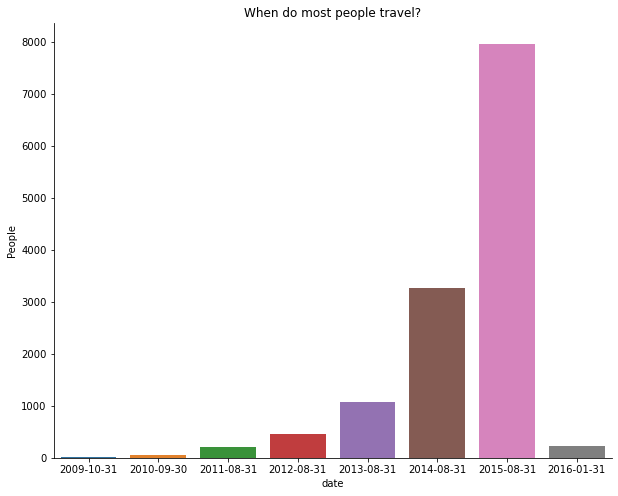

In [125]:
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x=travel_date, y=tavel_value);

plt.title("When do most people travel?")
plt.xlabel('date')
plt.ylabel('People')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


This really looks good, as we have found that september seems to recieve more reviews as this indicates when most people travel during the year.

SO our question is answered

**When do most people travel?** During the month of September

# DATA PREPERATION


**PROCESSES INVOLVED**

* removing or imputing null values
* checking and removing features with high correlation
* choosing which features to use in our model
* feature engineering
* converting categorical variables to numberical(on-hot-encoding)


In [126]:
# count the percent number of nulls in each column


for col in new_listing_df.columns:
    percen_null = new_listing_df[col].isnull().sum()/ new_listing_df.shape[0]
    print(col, "percent_null({})".format(percen_null) )


city percent_null(0.0)
zipcode percent_null(0.001880288310874334)
smart_location percent_null(0.0)
is_location_exact percent_null(0.0)
property_type percent_null(0.0)
room_type percent_null(0.0)
bed_type percent_null(0.0)
amenities percent_null(0.0)
price percent_null(0.0)
weekly_price percent_null(0.4359135067376998)
monthly_price percent_null(0.5734879348166719)
security_deposit percent_null(0.4935756816045127)
cleaning_fee percent_null(0.24067690379191475)
extra_people percent_null(0.0)
calendar_updated percent_null(0.0)
first_review percent_null(0.0)
last_review percent_null(0.0)
accommodates percent_null(0.0)
bathrooms percent_null(0.003760576621748668)
bedrooms percent_null(0.001880288310874334)
beds percent_null(0.0)
square_feet percent_null(0.9711689125665935)
guests_included percent_null(0.0)
availability_30 percent_null(0.0)
availability_60 percent_null(0.0)
availability_90 percent_null(0.0)
availability_365 percent_null(0.0)
review_scores_rating percent_null(0.00626762770291

In [127]:
# remove square_feet  column as this has almost all its rows null
new_listing_df=new_listing_df.drop(columns=['square_feet'])

In [128]:
# drop columns that will not be needed
drop_column_list=['city','zipcode','smart_location','is_location_exact']

new_listing_df=new_listing_df.drop(columns=drop_column_list)
new_listing_df.head()

,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,...,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy
0,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,NaN,NaN,$5.00,...,1.0,1.0,1.0,2,14,41,71,346,95.0,10.0
1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,...,1.0,1.0,1.0,1,13,13,16,291,96.0,10.0
2,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,NaN,"$1,000.00",$300.00,$25.00,...,4.5,5.0,7.0,10,1,6,17,220,97.0,10.0
4,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,NaN,NaN,$700.00,$125.00,$15.00,...,2.0,3.0,3.0,6,30,60,90,365,92.0,9.0
5,House,Private room,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,$800.00,NaN,NaN,$40.00,$30.00,...,1.0,1.0,1.0,1,0,0,27,302,95.0,10.0


In [129]:
# bathrooms ( replace null values with mode )
# bedrooms  (replace null values with mode )

fill_mode = lambda col: col.fillna(col.mode())
try:
    new_listing_df[['bathrooms','bedrooms']].apply(fill_mode, axis=0)
except:
    print('That broke...')


In [130]:
new_listing_df.head()

,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,...,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy
0,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,NaN,NaN,$5.00,...,1.0,1.0,1.0,2,14,41,71,346,95.0,10.0
1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00,...,1.0,1.0,1.0,1,13,13,16,291,96.0,10.0
2,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,NaN,"$1,000.00",$300.00,$25.00,...,4.5,5.0,7.0,10,1,6,17,220,97.0,10.0
4,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,NaN,NaN,$700.00,$125.00,$15.00,...,2.0,3.0,3.0,6,30,60,90,365,92.0,9.0
5,House,Private room,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,$800.00,NaN,NaN,$40.00,$30.00,...,1.0,1.0,1.0,1,0,0,27,302,95.0,10.0


In [131]:
# remove dollar sign from prices
dollar_column = ['weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']

remove_dollar = lambda col: col.replace('[\$,]', '', regex=True).astype(float)
new_listing_df[dollar_column] = new_listing_df[dollar_column].apply(remove_dollar)

In [132]:
# fill price columns with mean
fill_mean = lambda col: col.fillna(col.mean())
new_listing_df[dollar_column] = new_listing_df[dollar_column].apply(fill_mean)

In [133]:
new_listing_df.head()

,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,...,bathrooms,bedrooms,beds,guests_included,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy
0,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,788.400556,2641.637766,279.621287,61.15518,5.0,...,1.0,1.0,1.0,2,14,41,71,346,95.0,10.0
1,Apartment,Entire home/apt,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1000.000000,3000.000000,100.000000,40.00000,0.0,...,1.0,1.0,1.0,1,13,13,16,291,96.0,10.0
2,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,788.400556,2641.637766,1000.000000,300.00000,25.0,...,4.5,5.0,7.0,10,1,6,17,220,97.0,10.0
4,House,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,788.400556,2641.637766,700.000000,125.00000,15.0,...,2.0,3.0,3.0,6,30,60,90,365,92.0,9.0
5,House,Private room,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,800.000000,2641.637766,279.621287,40.00000,30.0,...,1.0,1.0,1.0,1,0,0,27,302,95.0,10.0


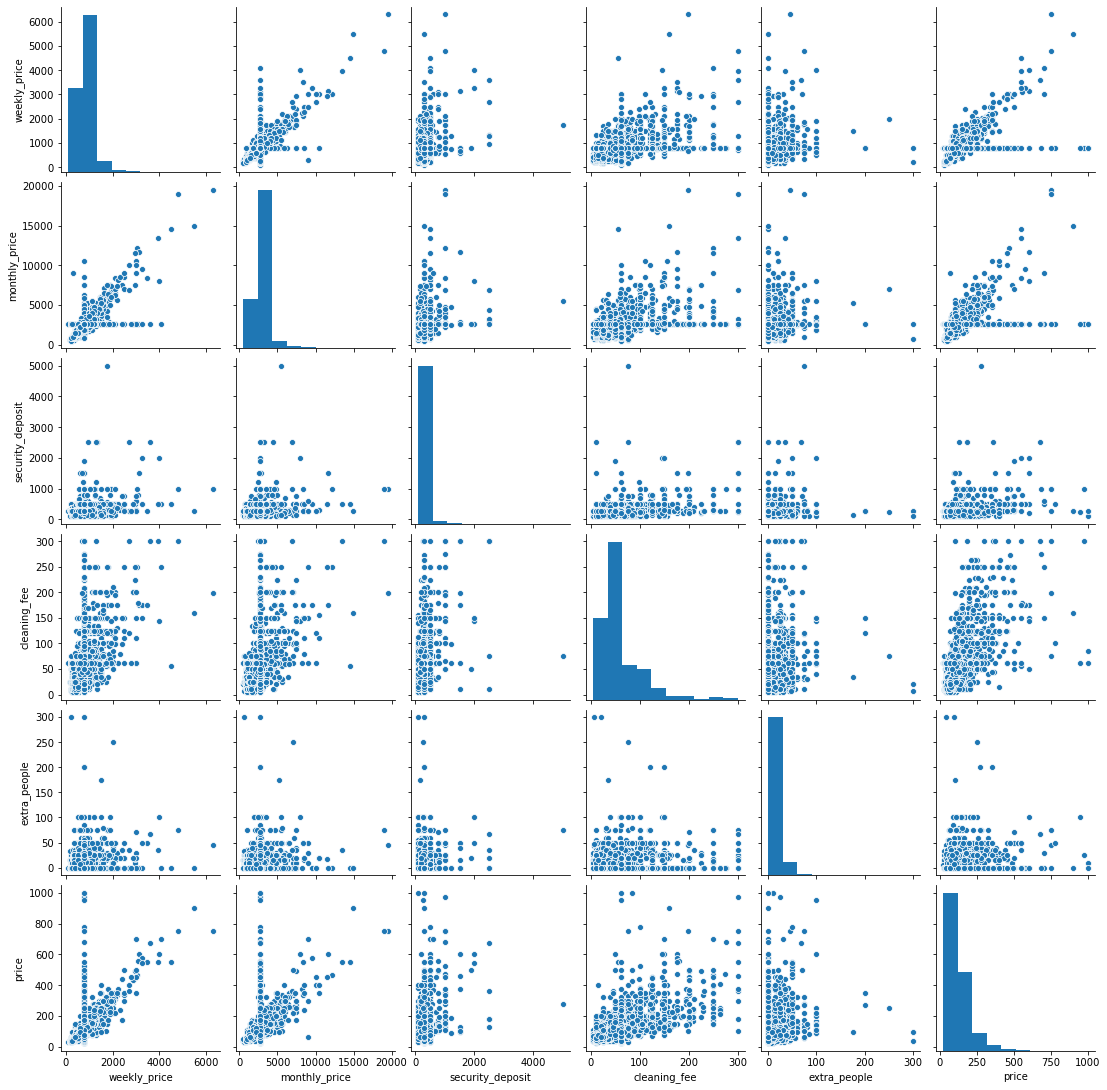

In [134]:
# check how each dollar column correlates with price

sns.pairplot(new_listing_df[dollar_column +['price']])

weekly and monthly price are positively correlate with price

In [135]:
# remove all other price columns as they have positive correlation with price
# this would ensure that our model fits the right column and remove any data leakage
new_listing_df=new_listing_df.drop(columns=['weekly_price','monthly_price','security_deposit','extra_people','cleaning_fee'])

Get categorical columns and convert them

In [136]:
# select categorical date
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = new_listing_df.select_dtypes(exclude=numerics).columns
categorical_columns

Index(['property_type', 'room_type', 'bed_type', 'amenities',
       'calendar_updated', 'first_review', 'last_review'],
      dtype='object')

In [137]:
# drop date columns
new_listing_df=new_listing_df.drop(columns=['calendar_updated','first_review','last_review',
                                            'availability_30', 'availability_60', 'availability_90','availability_365'])

In [138]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [139]:

col_list= ['is_location_exact', 'property_type', 'room_type', 'bed_type']
df_new = create_dummy_df(new_listing_df,col_list, dummy_na=False) 

print(df_new.shape)

(3191, 30)


create categorical variable for the amenity column


In [140]:
# create categorical columns for amenities
# convert amenities into list for each row

def get_amen_unique(df):
    '''
    INPUT: 
         df - a dataframe holding a amenities columns wiht values


    OUTPUT:
          list_amenities - a list of unique amenities in the amenities column of the dataframe

    '''
    list_amenities =[]
    for row in df_new.amenities.iteritems():
        item = row[1].replace('{', '').replace('}', '').replace('"','')
        for amen in item.split(','):
            list_amenities.append(amen)
            
    return set(list_amenities)
        

    
unique_amen=get_amen_unique(df_new)

In [141]:

def amen_categorical(df,col_list):
    '''
    INPUT: 
         df - the dataframe containing amenities column to convert to categorical
         col_list - the list of unique amenities in the amenities column of the dataframe

    OUTPUT:

            df - a new dataframe with categorical one-hot-encoded columns from the amenities column 

    '''
    #create columns for each amen type

    for new_col in unique_amen:
        if new_col != '':
            df['amen_'+ new_col] = None

            for row in df.amenities.iteritems():
                item = row[1].replace('{', '').replace('}', '').replace('"','')
                amenities =[amen for amen in item.split(',') ]
                index =row[0]
                if new_col in amenities:
                    df.at[index, 'amen_'+ new_col] = 1

                else:
                    df.at[index, 'amen_'+ new_col] = 0
    # remove original amenities column
    df = df.drop(columns=['amenities'])
    return df                

In [142]:
df_new=amen_categorical(df_new,unique_amen)

In [143]:
# drop amenities column
df_new=df_new.drop(columns=['review_scores_rating', 'review_scores_accuracy'])
print(df_new.shape)

(3191, 68)


In [144]:
df_new.head()

,price,accommodates,bathrooms,bedrooms,beds,guests_included,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,...,amen_Fire Extinguisher,amen_Carbon Monoxide Detector,amen_Heating,amen_Air Conditioning,amen_Doorman,amen_Hangers,amen_Free Parking on Premises,amen_Wheelchair Accessible,amen_Iron,amen_Internet
0,85.0,4,1.0,1.0,1.0,2,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,150.0,4,1.0,1.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,1,0,0,1
2,975.0,11,4.5,5.0,7.0,10,0,0,0,0,...,0,1,1,1,0,0,1,0,0,1
4,450.0,6,2.0,3.0,3.0,6,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
5,120.0,2,1.0,1.0,1.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# TRAIN MODEL & EVALUATION

In [145]:
def clean_fit_linear_mod(df, response_col,test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model

    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)


    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)
  

    # shuffle data
    df = shuffle(df)
    
    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'price')

In [146]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5916445951778971.  The rsquared on the test data was 0.51958991211896.


In [147]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
18,property_type_Treehouse,122.647231,122.647231
12,property_type_Dorm,-115.760405,115.760405
21,room_type_Shared room,-71.653051,71.653051
61,amen_Doorman,51.546023,51.546023
20,room_type_Private room,-42.909294,42.909294
14,property_type_Loft,39.121502,39.121502
2,bedrooms,34.012587,34.012587
16,property_type_Tent,-31.873951,31.873951
46,amen_Washer / Dryer,-29.949777,29.949777
1,bathrooms,26.164799,26.164799


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


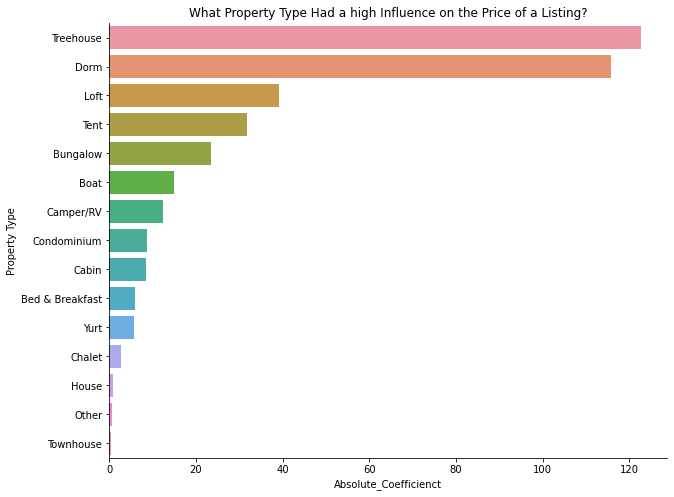

In [153]:
f, ax = plt.subplots(figsize=(10, 8))

# which property type influenced price the most
property_type = coef_df[coef_df.est_int.str.startswith('property_type')]
property_type['est_int']= property_type['est_int'].str.replace('property_type_','')
sns.barplot(data=property_type, x="abs_coefs", y="est_int", orient="h");

plt.title('What Property Type Had a high Influence on the Price of a Listing?')
plt.xlabel('Absolute_Coefficienct')
plt.ylabel('Property Type')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

As we can see Boat has a very high influence on the price compared with other listing property type

In [149]:
def show_values_on_bars(axs):
    '''
    INPUT:
         ax- the axis of the plot to show values on top of the bar plot
    OUTPUT:
          bar plot with text on bar 
    '''
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


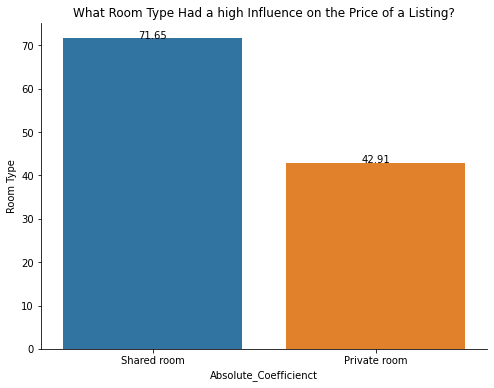

In [150]:

f, ax = plt.subplots(figsize=(8, 6))

# which room type influenced price the most
room_type = coef_df[coef_df.est_int.str.startswith('room_type')]
room_type['est_int']= room_type['est_int'].str.replace('room_type_','')

g=sns.barplot(data=room_type, x="est_int", y="abs_coefs");
plt.title('What Room Type Had a high Influence on the Price of a Listing?')
plt.xlabel('Absolute_Coefficienct')
plt.ylabel('Room Type')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

show_values_on_bars(ax)

Shared room has high influence on the price

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


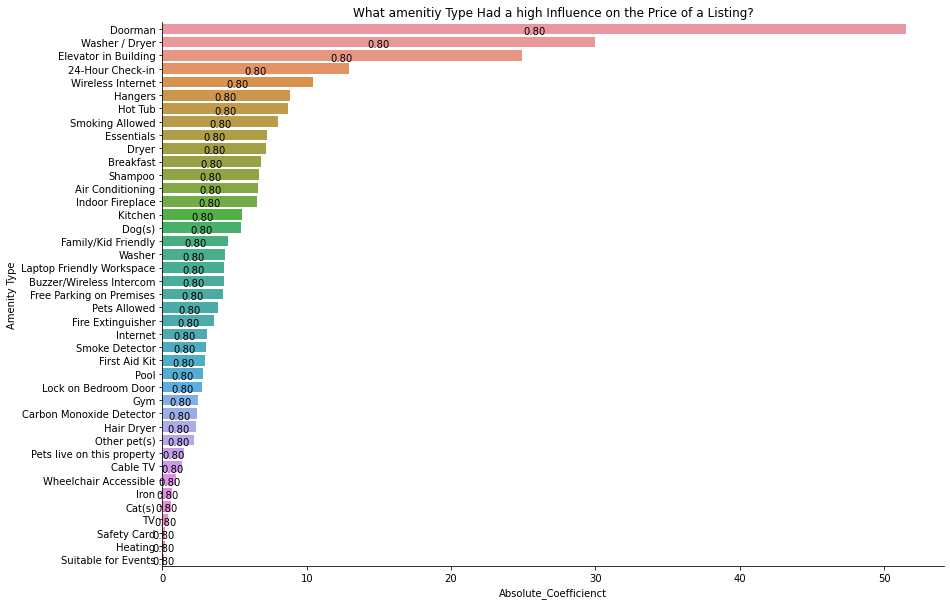

In [151]:
# which amenitiy had a high influence on the price

f, ax = plt.subplots(figsize=(14, 10))
amenity_type = coef_df[coef_df.est_int.str.startswith('amen')]
amenity_type['est_int']= amenity_type['est_int'].str.replace('amen_','')

sns.barplot(data=amenity_type, x="abs_coefs", y="est_int", orient="h");
plt.title('What amenitiy Type Had a high Influence on the Price of a Listing?')
plt.xlabel('Absolute_Coefficienct')
plt.ylabel('Amenity Type')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


Doorman and Elevator had a hgih influence on price

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


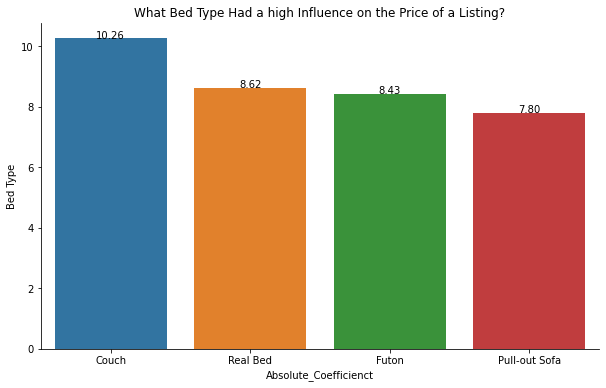

In [152]:
# which bed type had a high influence on the price

f, ax = plt.subplots(figsize=(10, 6))
bed_type = coef_df[coef_df.est_int.str.startswith('bed_type')]
bed_type['est_int']= bed_type['est_int'].str.replace('bed_type_','')

sns.barplot(data=bed_type, x="est_int", y="abs_coefs");
plt.title('What Bed Type Had a high Influence on the Price of a Listing?')
plt.xlabel('Absolute_Coefficienct')
plt.ylabel('Bed Type')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

show_values_on_bars(ax)

Futon looks to be the highest influencer on price and couch just bottomed down

# Summary


This notebook uses data from the Seattle area of Airbnb and has been analyzed to answer the following questions.


* What type of property type are most people interested in?
  
  From the histogram of showing property type and number of reviews, House and Apartment are what most people are intereste in.
  
* What are the top 10 characteristics of listing that influence the price of listings?
    
  From the statistical inference of the model,property types with Boat,Dorm,Loft, and Treehouse greatly influenced the price of listings. Again, Shared room type had a high price tag than Prive room. Then, Doorman and Washer amenities really spiked the prices of listings. We also saw that higher number of bedrroms increase prices of listings



* When is the best time to host a listing for booking?

  There is a busy season and from the timeline there was definitely an increase every year of the number of   people who travel. We found out that most of these travelers like to travel in september.
  So the best time to host a listing for booking is september



